<a href="https://colab.research.google.com/github/roopamrv/myweb/blob/main/titanic_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TITANIC PREDICTION***

---



In Kaggle Competitions The Titanic data set is a well known data set. The tutorial provided by Kaggle will be discussed in this blog for the Titanic data set, as well as some additional contributions using Logistic Regression, Random Forest Classifier with modules such as Scikit-Learn, Matplotlip, Numpy, Panda, etc.


**All of the following code until the section marked “MY PREDICTION” was taken from https://www.kaggle.com/alexisbcook/titanic-tutorial for educational and learning purposes.**

In [47]:
#LOADING MODULES

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("deep")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Loading datasets
reading train and test datasets

In [48]:
train_data = pd.read_csv("/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looking into the training dataset
Printing first 5 rows of the train dataset.

In [49]:
test_data = pd.read_csv("/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Below is a brief information about each columns of the dataset:

**PassengerId:** An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

**Survived:** Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

**Pclass:** Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

**Name:** Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

**Sex:** Passenger's sex. It's either Male or Female.

**Age:** Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

**SibSp:** Number of siblings or spouses travelling with each passenger.

**Parch:** Number of parents of children travelling with each passenger.

**Ticket:** Ticket number.

**Fare:** How much money the passenger has paid for the travel journey.

**Cabin:** Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.

**Embarked:** Port from where the particular passenger was embarked/boarded.


Total rows and columns

We can see that there are 891 rows and 12 columns in our training dataset.

In [50]:
submission = pd.read_csv("/gender_submission.csv")

In [51]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [52]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [53]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [54]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


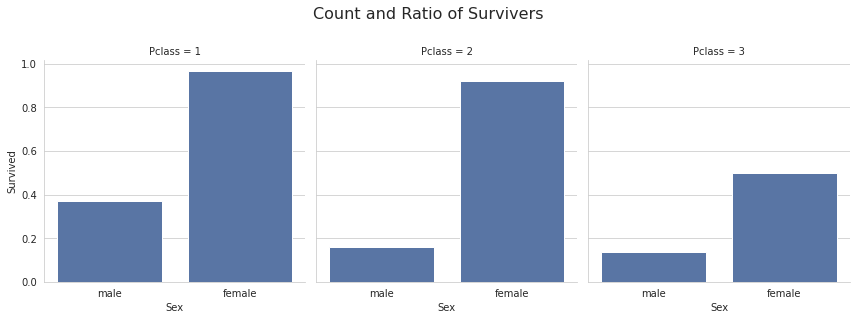

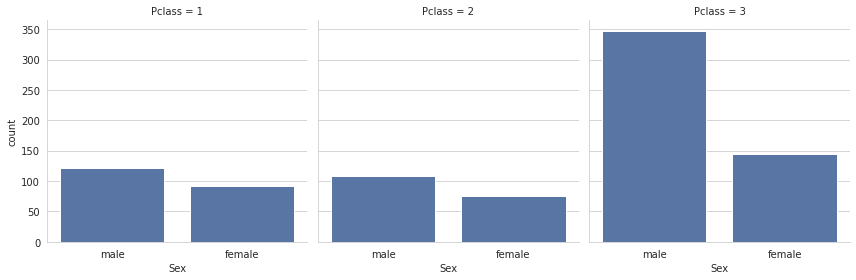

In [55]:
tmp = train_data.drop(columns="Cabin").drop(index=train_data.loc[train_data["Embarked"].isna()].index) # i delete the uninsightful columns and indices temporarily
mean_tmp = tmp[["Pclass", "Sex", "Survived"]].groupby(["Pclass", "Sex"], as_index=False).mean()

#fig = plt.figure(figsize=(10, 15))

subfig = fig.subplots(2, 1)

g1 = sns.FacetGrid(mean_tmp, col="Pclass", aspect=1, height=4)
g1.map(sns.barplot, "Sex", "Survived", order=["male", "female"])

g2 = sns.FacetGrid(tmp, col="Pclass", aspect=1, height=4)
g2.map(sns.countplot, "Sex", order=["male", "female"])

subfig[0] = g1.figure
subfig[0].suptitle("Count and Ratio of Survivers", y=1.1, fontsize=16)
subfig[1] = g2.figure

There is a strong correlation between the passengerclass, the sex and the rate of survival. In the following we will look at the correlation between the age and survival rate.

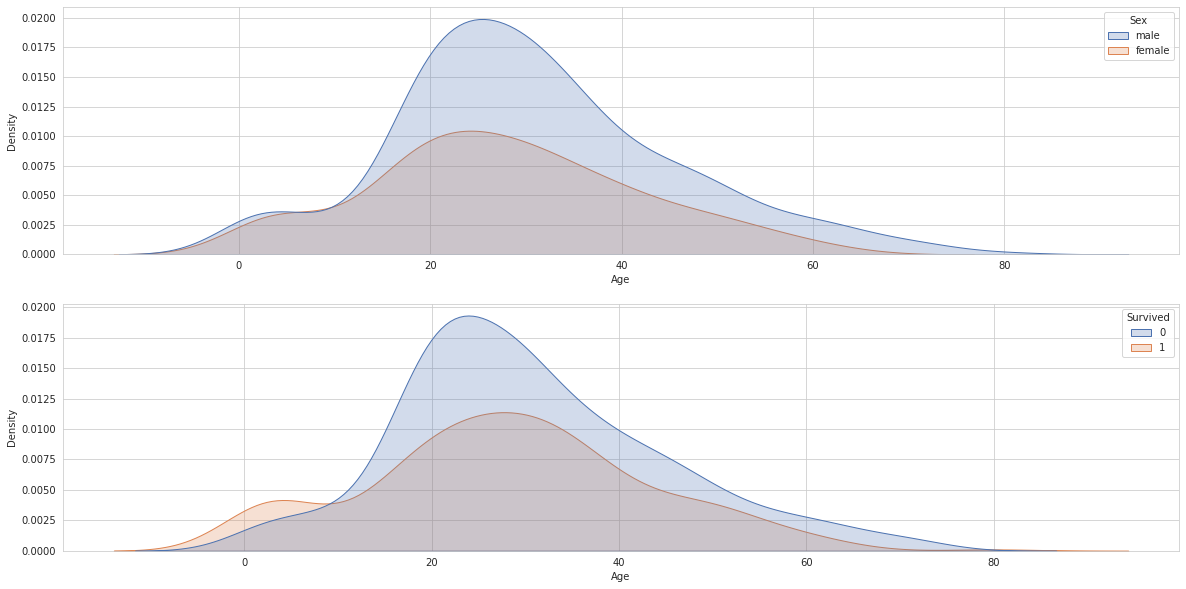

In [56]:
tmp = train_data.drop(columns="Cabin").drop(index=train_data.loc[train_data["Embarked"].isna()].index) # i delete the uninsightful columns and indices temporarily

fig, (ax1, ax2) =plt.subplots(2, 1, figsize=(20,10))

sns.kdeplot(data=tmp, x="Age", shade=True, hue="Sex", ax=ax1)
sns.kdeplot(data=tmp, x="Age", shade=True, hue="Survived", ax=ax2)

These plots show, that children are much more likely to survive than middle-aged people. The first plot is just for basic visualization of the age distribtion on the titanic.

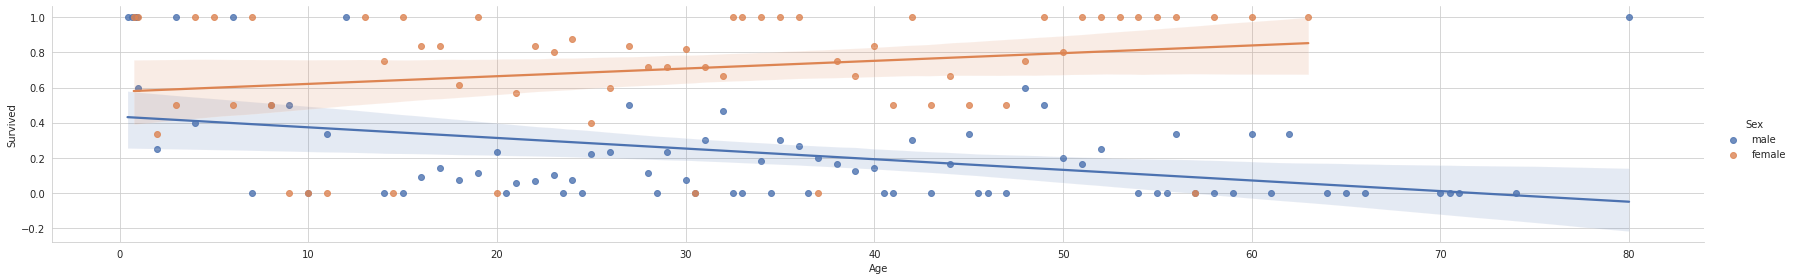

In [57]:
tmp_mean = tmp[["Sex", "Age", "Survived"]].groupby(["Age", "Sex"], as_index=False).mean()
sns.lmplot(data=tmp_mean, x="Age", y="Survived", hue="Sex", aspect=6, height=4)

The last plot shows a linear correlation between age, sex and probability of survival. As you can see, not only were women much more likely to survive but the age didn't play as big of a role as for male passengers.

As you can see, the Cabin attribute is too incomplete as to being useful. Which is unfortunate, because the attribute might have given some insight. One possibility would be to transform the cabins into areas and then derive the area from the ticket price for the missing values. And I could look at surnames of the passengers to find the missing Embarked values. But I decided not to bother. The missing values in Age can be easily replaced by the sklearn SimpleImputer class with strategy="median". The PassengerID doesn't have any meaning too. And some Columns are dropped for simplicity. Sex is converted to a binary numeric attribute.

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression

drop_labels = ["PassengerId", "Cabin", "Ticket", "Name"]
class FullPrep(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.drop(columns=drop_labels)

drop_na_labels = list(train_data) # I know that this isn't nececary
num_labels = ["Pclass", "Age", "SibSp", "Parch", "Fare"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

embarked_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_enc", OneHotEncoder())
])

column_t = ColumnTransformer([
    ("num", num_pipeline, num_labels),
    ("embarked", embarked_pipeline, ["Embarked"]),
    ("sex", OrdinalEncoder(), ["Sex"])
])

full_pipeline = Pipeline([
    ("dropna", FullPrep()),
    ("columns", column_t),
])

train_X, test_X = full_pipeline.fit_transform(train_data.drop(columns="Survived")), full_pipeline.fit_transform(test_data)
train_y = train_data["Survived"]
train_X[0], train_y[0]

(array([ 3.  , 22.  ,  1.  ,  0.  ,  7.25,  0.  ,  0.  ,  1.  ,  1.  ]), 0)

First I tried LinearRegression but then I noticed that I need a classifier.

In [59]:
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
result = cross_val_score(lin_reg, train_X, train_y, cv=10)
result.mean()

0.36296337552336555

Using "Random Forest Classifier here"

In [60]:
from sklearn.ensemble import RandomForestClassifier

reg = RandomForestClassifier(n_estimators=100)
score = cross_val_score(reg, train_X, train_y, cv=10)
score.mean()

0.8126716604244694

Obviously the classifier works much better. At this point I could test some other models, but not for now. Therefore final submission:

In [61]:
# Final training
reg.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": reg.predict(test_X)
})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


It's time to create a submission.csv file to upload to the Kaggle competition!

In [63]:
submission.to_csv("submission.csv", index=False)